In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12847, done.
remote: Total 12847 (delta 0), reused 0 (delta 0), pack-reused 12847
Receiving objects: 100% (12847/12847), 11.81 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (8923/8923), done.


In [2]:
%cd yolov5

/content/yolov5


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 4.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 21, 18

In [5]:
import requests
url = "https://drive.google.com/uc?id=1lvse1tfnih2rGflF-N2ZhVjegvaxLxC0&export=download"
r = requests.get(url)
with open('image1.jpg', 'wb') as f:
   f.write(r.content)

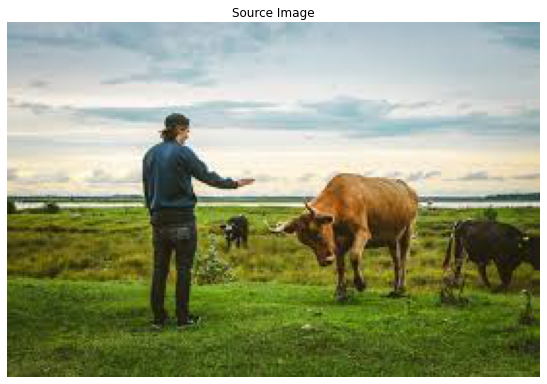

In [6]:
image1 = plt.imread('/content/yolov5/image1.jpg')
plt.subplot(121)
plt.imshow(image1)
plt.axis('off')
plt.title('Source Image')
plt.show()

In [7]:
!python detect.py --source image1.jpg --weights yolov5s.pt --project infer_yolov5s

detect: weights=['yolov5s.pt'], source=image1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5s, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-135-g7926afc torch 1.10.0+cu111 CPU

100% 14.1M/14.1M [00:00<00:00, 16.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/yolov5/image1.jpg: 448x640 1 person, 3 cows, Done. (0.326s)
Speed: 3.9ms pre-process, 326.0ms inference, 16.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5s/exp


In [8]:
!python detect.py --source image1.jpg --weights yolov5x.pt --project infer_yolov5x

detect: weights=['yolov5x.pt'], source=image1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5x, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-135-g7926afc torch 1.10.0+cu111 CPU

100% 166M/166M [00:52<00:00, 3.32MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.7 GFLOPs
image 1/1 /content/yolov5/image1.jpg: 448x640 1 person, 4 cows, Done. (2.697s)
Speed: 3.2ms pre-process, 2697.4ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5x/exp


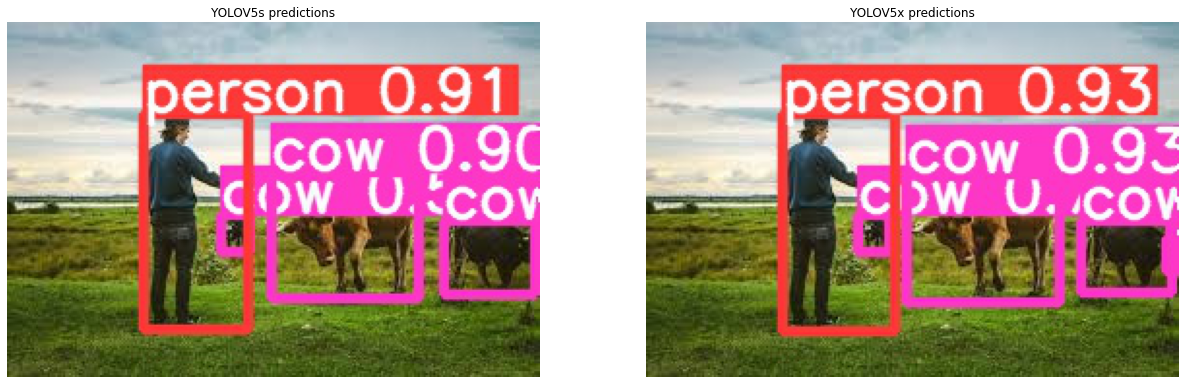

In [9]:
image1a = plt.imread('/content/yolov5/infer_yolov5s/exp/image1.jpg')
image1b = plt.imread('/content/yolov5/infer_yolov5x/exp/image1.jpg')

plt.subplot(121)
plt.imshow(image1a)
plt.axis('off')
plt.title('YOLOV5s predictions')

plt.subplot(122)
plt.imshow(image1b)
plt.axis('off')
plt.title('YOLOV5x predictions')

plt.show()

In [22]:
# encrypt image using XOR
import numpy as np
from google.colab.patches import cv2_imshow
import requests
url = "https://drive.google.com/uc?id=1lvse1tfnih2rGflF-N2ZhVjegvaxLxC0&export=download"
r = requests.get(url)
with open('image1.jpg', 'wb') as f:
   f.write(r.content)
img1 = cv2.imread("image1.jpg")
width, height, deep = img1.shape
imgKeyX = np.random.randint(0, 256, size=[width, height, deep], dtype=np.uint8)
cv2.imwrite("imgKeyX.jpg",imgKeyX)
imgEncryptX = cv2.bitwise_xor(img1, imgKeyX)
cv2.imwrite("imgEncryptX.jpg",imgEncryptX)
# save imgKeyX and imgEncryptX obtained to cloud for retrieval

True

In [23]:
# retrieve encryption image key from cloud
import requests
urlkey = "https://drive.google.com/uc?id=16G1JL5aTp_E4Q5cH6D7_7r_ALGPX-yRl&export=download"
rkey = requests.get(urlkey)
with open('imgKeyXOR.jpg', 'wb') as fkey:
   fkey.write(rkey.content)

In [24]:
# retrieve encrypted image from cloud
urlencrypt = "https://drive.google.com/uc?id=1swT0yRcOkvIC-7cBjBXjtJQqvPMvzAlW&export=download"
rencrypt = requests.get(urlencrypt)
with open('imgEncryptXOR.jpg', 'wb') as fencrypt:
   fencrypt.write(rencrypt.content)

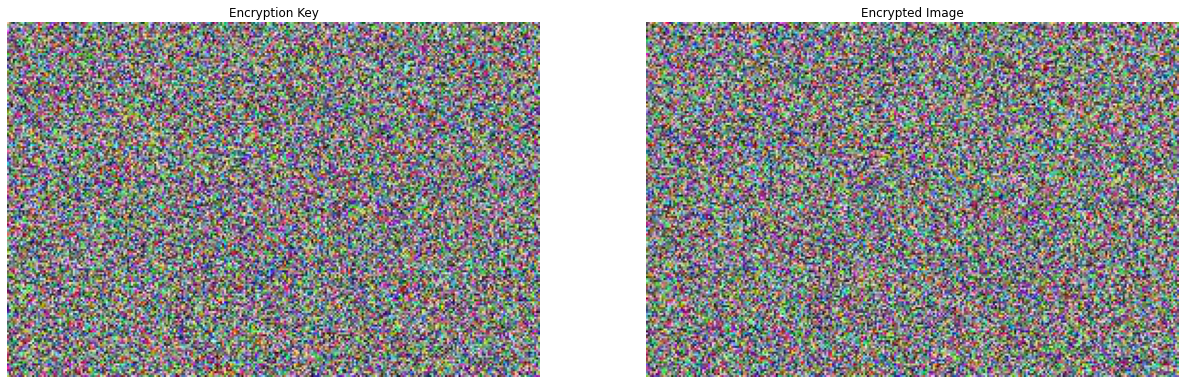

In [25]:
# display encryption key and encrypted image 
imagekey = plt.imread('/content/yolov5/imgKeyXOR.jpg')
imageencrypt = plt.imread('/content/yolov5/imgEncryptXOR.jpg')

plt.subplot(121)
plt.imshow(imagekey)
plt.axis('off')
plt.title('Encryption Key')

plt.subplot(122)
plt.imshow(imageencrypt)
plt.axis('off')
plt.title('Encrypted Image')

plt.show()

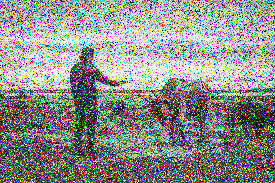

True

In [27]:
# decrypt encrypted image
import cv2
from google.colab.patches import cv2_imshow
imagekey = cv2.imread('/content/yolov5/imgKeyXOR.jpg')
imageencrypt = cv2.imread('/content/yolov5/imgEncryptXOR.jpg')
imagedecrypt = cv2.bitwise_xor(imageencrypt, imagekey)
cv2_imshow(imagedecrypt)
cv2.imwrite("imgDecryptXOR.jpg",imagedecrypt)
#cv2.imwrite("imagedecrypt.jpg",imagedecrypt)
#plt.subplot(121)
#plt.imshow(imagedecrypt)
#plt.axis('off')
#plt.title('Decrypted Image')

#plt.show()


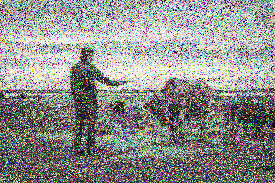

'\ncv2.imwrite("imgdecrypt.jpg",imgdecrypt)\nplt.subplot(121)\nplt.imshow(imgdecrypt)\nplt.axis(\'off\')\nplt.title(\'Decrypted Image\')\n\nplt.show()\n'

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
img1 = cv2.imread("/content/yolov5/image1.jpg")
width, height, deep = img1.shape
imgkey = np.random.randint(0, 256, size=[width, height, deep], dtype=np.uint8)
cv2.imwrite("/content/yolov5/imgkey.jpg",imgkey)
imgencrypt = cv2.bitwise_xor(img1, imgkey)
cv2.imwrite("/content/yolov5/imgencrypt.jpg",imgencrypt)
#imgdecrypt = cv2.bitwise_xor(imgencrypt, imgkey)
imgkey1 = cv2.imread('/content/yolov5/imagekey.jpg')
imgencrypt1 = cv2.imread('/content/yolov5/imageencrypt.jpg')
imgdecrypt = cv2.bitwise_xor(imgencrypt1, imgkey1)
cv2_imshow(imgdecrypt)
"""
cv2.imwrite("imgdecrypt.jpg",imgdecrypt)
plt.subplot(121)
plt.imshow(imgdecrypt)
plt.axis('off')
plt.title('Decrypted Image')

plt.show()
"""

In [ ]:
!python detect.py --source image2.jpg --weights yolov5s.pt --project infer_yolov5s

detect: weights=['yolov5s.pt'], source=image2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5s, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-127-gfa569cd torch 1.10.0+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/yolov5/image2.jpg: 448x640 1 person, 3 cows, Done. (0.309s)
Speed: 2.9ms pre-process, 308.6ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5s/exp2


In [ ]:
!python detect.py --source image2.jpg --weights yolov5x.pt --project infer_yolov5x

detect: weights=['yolov5x.pt'], source=image2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5x, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-127-gfa569cd torch 1.10.0+cu111 CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.7 GFLOPs
image 1/1 /content/yolov5/image2.jpg: 448x640 1 person, 4 cows, Done. (2.665s)
Speed: 2.8ms pre-process, 2665.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5x/exp2


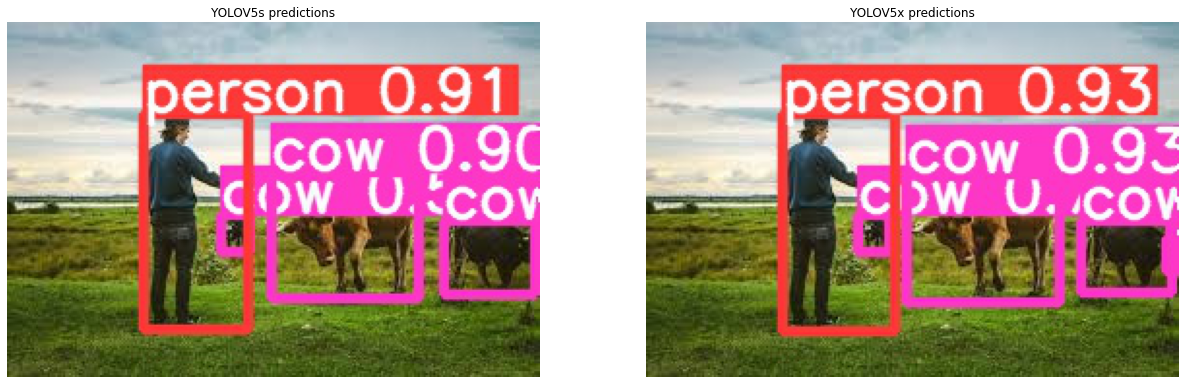

In [ ]:
image2a = plt.imread('/content/yolov5/infer_yolov5s/exp2/image2.jpg')
image2b = plt.imread('/content/yolov5/infer_yolov5x/exp2/image2.jpg')

plt.subplot(121)
plt.imshow(image2a)
plt.axis('off')
plt.title('YOLOV5s predictions')

plt.subplot(122)
plt.imshow(image2b)
plt.axis('off')
plt.title('YOLOV5x predictions')

plt.show()

In [ ]:
!ls

CONTRIBUTING.md  export.py   LICENSE	       setup.cfg       val.py
data		 file.enc    models	       train.py
detect.py	 hubconf.py  README.md	       tutorial.ipynb
Dockerfile	 image1.jpg  requirements.txt  utils


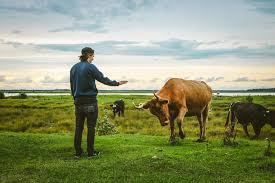

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x12\x13\x12\x15\x16\x15\x16\x17\x18\x16\x17\x17\x18\x18\x18\x18\x16\x17\x15\x18\x15\x17\x16\x15\x18\x15\x18\x18\x1d( \x1d\x1a%\x1d\x18\x17!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-& %------------+-------------------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x02\x03\x05\x06\x07\x08\xff\xc4\x00G\x10\x00\x01\x03\x02\x04\x03\x06\x02\x08\x03\x04\x08\x07\x01\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05Qa\x13"q\x81\x91\xa12\xc1\x06\x14BR\xb1\xd1\xe1\xf0\x15b\x82\x07#r\xf1C\x92\x93\xa2\xb2\xc2\xd2\xd3$34DES\xb3\x16\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00,\x11\x00\x02\x02\x01\x04\x02\x01\x02\x06\x02\x03\x00\x00\x00\x00\x00\x00\x01\x02\x11\x

In [ ]:
# Encryption with DES

!pip install pycrypto

from Crypto.Cipher import DES
from secrets import token_bytes
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2
#Taken three key from token bytes

key1=token_bytes(16)
key2=token_bytes(16)
key3=token_bytes(16)

#Encryption function using triple key

def encrypt(image):
  cipher1=DES.new(key1[0:8],DES.MODE_CBC,key1[8:16])
  ciphertext1=cipher1.encrypt(image)
  cipher2=DES.new(key2[0:8],DES.MODE_CBC,key2[8:16])
  ciphertext2=cipher2.decrypt(ciphertext1)
  cipher3=DES.new(key3[0:8],DES.MODE_CBC,key3[8:16])
  ciphertext3=cipher3.encrypt(ciphertext2)
  return ciphertext3

#Taken the image path from the user

#path=input("enter the path of the image")

# open image and show the image

import numpy as np
from google.colab.patches import cv2_imshow
import requests
url = "https://drive.google.com/uc?id=1bbjBobUPj4L6c_r9uG_-9ei76PfVe7Jm&export=download"
r = requests.get(url)
with open('image1.jpg', 'wb') as f:
   f.write(r.content)
imgenc = cv2.imread("image1.jpg")
cv2_imshow(imgenc)
#img= Image.open(path)
#plt.imshow(img)

# Main function for process the image and call the encryption function
with open("image1.jpg", 'rb') as imagefile:
  image=imagefile.read()
while len(image)%8!=0:
  image+=b" "
ciphertext=encrypt(image)
print(image)
#print the encrypted from of the image
print(ciphertext)
with open('/content/fileDES.enc', 'wb') as f:
    f.write(ciphertext)
# save file.enc obtained to cloud for retrieval

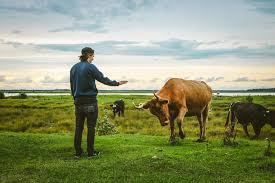

In [ ]:
# Decryption function
# Encryption and Descryption key is same

def decrypt(ciphertext):
  cipher1=DES.new(key3[0:8],DES.MODE_CBC,key3[8:16])
  plaintext1=cipher1.decrypt(ciphertext)
  cipher2=DES.new(key2[0:8],DES.MODE_CBC,key2[8:16])
  plaintext2=cipher2.encrypt(plaintext1)
  cipher3=DES.new(key1[0:8],DES.MODE_CBC,key1[8:16])
  plaintext3=cipher3.decrypt(plaintext2)
  return plaintext3


import requests
url = "https://drive.google.com/uc?id=1F_UOw5yEOC_CPGJsjQk_GxmdxSRVR2QM&export=download"
r = requests.get(url)
with open('ciphertext', 'wb') as f:
   f.write(r.content)

# call the decryption function

plaintext=decrypt(ciphertext)

# Converting data to image
# In epath we can use any path where we want to save data
# After that that the data will be converted into image


with open("/content/imgdec.jpg", 'wb') as f:
	f.write(plaintext)
#img=Image.open("/content/untitled")
#plt.imshow(img)
imgdec = cv2.imread("/content/imgdec.jpg")
cv2_imshow(imgdec)


In [ ]:
!python detect.py --source "/content/imgdec.jpg" --weights yolov5s.pt --project infer_yolov5s
!python detect.py --source "/content/imgdec.jpg" --weights yolov5x.pt --project infer_yolov5x

detect: weights=['yolov5s.pt'], source=/content/imgdec.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov5s, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-135-g7926afc torch 1.10.0+cu111 CPU

100% 14.1M/14.1M [00:00<00:00, 101MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/imgdec.jpg: 448x640 1 person, 3 cows, Done. (0.309s)
Speed: 3.2ms pre-process, 309.0ms inference, 14.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov5s/exp
detect: weights=['yolov5x.pt'], source=/content/imgdec.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, 

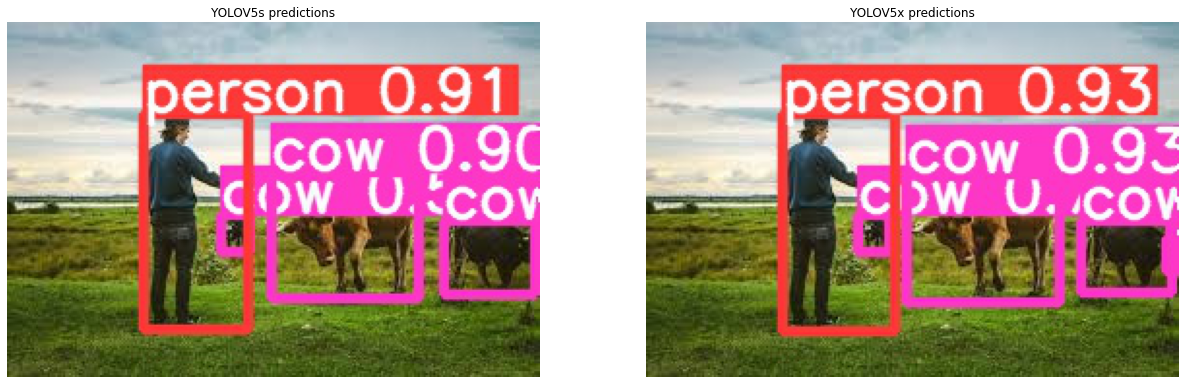

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 21, 18
imgdec1a = plt.imread('/content/yolov5/infer_yolov5s/exp/imgdec.jpg')
imgdec1b = plt.imread('/content/yolov5/infer_yolov5x/exp/imgdec.jpg')

plt.subplot(121)
plt.imshow(imgdec1a)
plt.axis('off')
plt.title('YOLOV5s predictions')

plt.subplot(122)
plt.imshow(imgdec1b)
plt.axis('off')
plt.title('YOLOV5x predictions')

plt.show()